# Linear regression as a simple neural network

Suppose we have a bivariate data set $x$ and $y$ and we wish to fit a linear model, $\hat{y} = wx + b$, to it. The classical approach is to use least squares regression: a model which minimises the squares of the residuals between the measured value and the predicted value.

This can also be achieved through the use of a simple neural network consisting of just an input layer of one neuron and an output layer of one neuron. There is one edge connecting them which scalar multiplies the input vector by a __weight__ $w$ and adds a __bias__ $b$ to each component of the vector.

The data we're using consists of a training set: a randomly generated set of 700 pairs of points for which a linear model is suitable, and a testing set: a similarly randomly generated set of 300 pairs of points.

Summary statistics and statter plots of both sets of data are below:

In [1]:
import pandas as pd

df_train = pd.read_csv("LinRegTrain.csv")
df_test = pd.read_csv("LinRegTest.csv")

df_train.describe()

,x,y
count,700.000000,700.000000
mean,49.992857,49.911608
std,28.939406,29.097996
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.936330
75%,75.000000,74.880631
max,100.000000,108.871618


In [2]:
df_test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [3]:
import matplotlib.pyplot as plt

plt.scatter(df_train['x'], df_train['y'])
plt.title("Training data")
plt.show()

<Figure size 640x480 with 1 Axes>

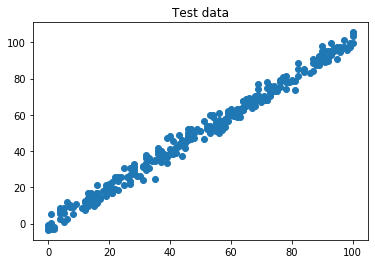

In [4]:
plt.scatter(df_test['x'], df_test['y'])
plt.title("Test data")
plt.show()

## Classical linear regression
Before we construct a neural network to find the linear model, we will use the classical linear regression model. Recall the gradient of the linear model is given by
\\[ w = \frac{\sum_{i=0}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=0}^n (x_i - \bar{x})^2}. \\]
The $y$-intercept is then given by
\\[ b = \bar{y} - m \bar{x}. \\]

In [5]:
import numpy as np

# create vectors of the appropriate shape of training data values
x = np.array(df_train['x']).reshape(-1,1)
y = np.array(df_train['y']).reshape(-1,1)

w_calc = np.sum((x - x.mean())*(y - y.mean())) / np.sum((x - x.mean())**2)
b_calc = y.mean() - w_calc * x.mean()
print("w = ", w_calc) 
print("b = ", b_calc)

w =  1.0007782480808467
b =  -0.12015553181318239


## Creating the network
We create two 700 dimensional vectors $w$ and $b$ initialised with zeroes. We then update these values through a loop which looks at the difference between the predicted values generated by $\hat{y} = wx + b$ and the training data $y$ values. Obviously, this first model will be a terrible fit. To create a better fit we use an error function and minimise the error using a technique called __gradient descent__.

Our error function of choice is the mean squared error:
\\[ J := 1/n \sum_{i=1}^n (\hat{y}_i - y_i)^2. \\]
To choose the direction in which we should move we use the negative of the __gradient__:
\\[ \nabla J = \left[ \begin{array}{c} \frac{\partial J}{\partial w} \\ \frac{\partial J}{\partial b} \end{array} \right]. \\]
This is because the gradient gives us the direction in which we should travel to increase the value of a multivariable function most rapidly. The negative then gives us the direction to _decrease_ the value of a function most rapidly.

For the mean squared error function, the gradient is found by substituting the equation for $\hat{y}$:
\\[ J = \sum_{i=1}^n (wx_i + b - y_i)^2 \\]
The gradient is then given by the partial derivatives:
\\[ \frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=0}^n x_i (w x_i + b - y_i) = \frac{2}{n} \sum_{i=0}^n x_i (\hat{y} - y_i), \\]
and
\\[ \frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=0}^n (w x_i + b - y_i) = \frac{2}{n} \sum_{i=0}^n (\hat{y} - y_i). \\]

To descend down the gradient carefully, we choose a parameter $\gamma$, sufficiently small, to move in the correct direction, but not so rapidly that we overshoot the minimum of the error function. The parameter $\gamma$ is known as the __learning rate__.

Gradient descent is then a loop for a given number of __epochs__ (iterations), where in each epoch we update the weight and bias as follows:
\\[ w_k = w_{k-1} - \gamma \times \frac{2}{n} \sum_{i=0}^n x_i (\hat{y} - y_i), \\]
and
\\[ b_k = b_{k-1} - \gamma \times \frac{2}{n} \sum_{i=0}^n (\hat{y} - y_i).  \\]

In [8]:
# create vectors of the appropriate shape of training data values
x = np.array(df_train['x']).reshape(-1,1)
y = np.array(df_train['y']).reshape(-1,1)

# key parameters
n = 700
gamma = 0.00000001
epochs = 10000000

# initialise our weight and bias vectors with zeros
w = np.zeros((n,1))
b = np.zeros((n,1))

for i in range(0,epochs):
    y_predicted = w * x + b
        
    errors = y_predicted - y
    MSE = np.sum(errors**2) / n

    w = w - gamma * 2 / n * np.sum(errors * x)
    b = b - gamma * 2 / n * np.sum(errors)
    
    if (i % 10000 == 0):
        print("w = ", w[0], "b = ", b[0], "MSE = ", MSE)

print("w = ", w[0], "b = ", b[0])

w =  [6.66433512e-05] b =  [9.98232169e-07] MSE =  3336.6524577344967
w =  [0.48632877] b =  [0.00728275] MSE =  884.2553137101332
w =  [0.73582909] b =  [0.01101571] MSE =  238.61306099308564
w =  [0.86384732] b =  [0.01292778] MSE =  68.63491527551669
w =  [0.92953331] b =  [0.01390557] MSE =  23.884792338585093
w =  [0.96323673] b =  [0.01440397] MSE =  12.103433407168508
w =  [0.98052994] b =  [0.0146564] MSE =  9.001756354611075
w =  [0.98940311] b =  [0.01478263] MSE =  8.185177933788166
w =  [0.99395597] b =  [0.0148441] MSE =  7.970197109496857
w =  [0.99629208] b =  [0.01487234] MSE =  7.9135988001584625
w =  [0.99749079] b =  [0.01488354] MSE =  7.898697833366464
w =  [0.99810589] b =  [0.01488598] MSE =  7.894774520136277
w =  [0.99842155] b =  [0.01488394] MSE =  7.893741292254558
w =  [0.99858356] b =  [0.0148796] MSE =  7.893468936771302
w =  [0.99866674] b =  [0.01487408] MSE =  7.89339689609161
w =  [0.99870947] b =  [0.01486795] MSE =  7.893377592296033
w =  [0.9987314

KeyboardInterrupt: 

In [7]:
print("w = ", w[0], "b = ", b[0])

w =  [0.9988519] b =  [0.008363]
